In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data
import statsmodels.api as sm

MA state code is 25.

Data on Ability to speak English is in row 29 for each year.

Total Population data is in row 0 for each year.

Education attainment data is in rows 30-33 for each year.

Employment by Occupation data is in rows 56-65 for each year.

In [2]:
start = 29
end = 29
ase = extract_data(start, end)

start = 0
end = 0
population = extract_data(start, end)

In [3]:
d = {'English Proficiency': np.array(population[25]) - np.array(ase[25])}
df = pd.DataFrame(data = d)
df

,English Proficiency
0,27903.0
1,22989.0
2,21125.0
3,27983.0
4,25659.0
5,28655.0
6,27515.0
7,26121.0
8,25566.0
9,26759.0


In [4]:
start = 30
end = 33
ea = extract_data(start, end)

ea_MA_all = []
years = list(range(2005, 2019+1))
labels = list(ea['State Code'].drop_duplicates())
for year in years:
    ea_year = ea[ea['Year'] == year]
    ea_MA_year = ea_year[25]
    ea_MA_all.append(ea_MA_year)
ea_MA_all = np.array(ea_MA_all)

In [5]:
for i in range(end - start + 1):
    df[labels[i]] = ea_MA_all[:,i]

In [6]:
start = 56
end = 65
eo = extract_data(start, end)

eo_MA_all = []
years = list(range(2005, 2019+1))
labels = list(eo['State Code'].drop_duplicates())
for year in years:
    eo_MA_year = eo[eo['Year'] == year][25]
    eo_MA_all.append(eo_MA_year)
eo_MA_all = np.array(eo_MA_all)

In [7]:
for i in range(end - start + 1):
    df[labels[i]] = eo_MA_all[:,i]
df

,English Proficiency,Less than high school,High School Graduate/GED or Alternative Credential,Some College/Associate Degree,Bachelors Degree or Higher,Management & Professional,Services,Sales and Office,Construction and Extracion,Maintenance and Repair,"Production, Transportation and Material Moving",Educational Instruction and Library Occupations,"Arts, Design, Entertainment, Sports, and Media Occupations",Healthcare Practitioner and Technical Occupations,Other
0,27903.0,21594.0,25049.0,10931.0,9592.0,16245.0,35904.0,10976.0,10546.0,641.0,10366.0,732.0,369.0,2160.0,608.0
1,22989.0,11347.0,27965.0,9689.0,7438.0,15329.0,27410.0,9058.0,12810.0,1116.0,8342.0,491.0,868.0,170.0,215.0
2,21125.0,10320.0,26161.0,9889.0,7955.0,3673.0,28507.0,5799.0,11357.0,616.0,6232.0,1014.0,172.0,350.0,202.0
3,27983.0,18269.0,22325.0,6486.0,8224.0,17546.0,29783.0,6188.0,10184.0,979.0,4854.0,901.0,432.0,162.0,53.0
4,25659.0,13908.0,21301.0,10980.0,10655.0,11526.0,30651.0,7753.0,8712.0,1674.0,6614.0,451.0,742.0,511.0,393.0
5,28655.0,14376.0,28606.0,12274.0,7395.0,11857.0,31956.0,8177.0,11532.0,1686.0,5341.0,822.0,489.0,783.0,317.0
6,27515.0,9038.0,23606.0,8040.0,12352.0,11593.0,27664.0,5727.0,8428.0,1488.0,4348.0,785.0,492.0,1302.0,1269.0
7,26121.0,8035.0,22269.0,5614.0,9860.0,13239.0,20083.0,6825.0,6799.0,1101.0,3885.0,1066.0,376.0,725.0,1010.0
8,25566.0,10600.0,22941.0,11173.0,9566.0,13346.0,23475.0,7267.0,7652.0,1862.0,4947.0,562.0,626.0,1052.0,814.0
9,26759.0,8661.0,26031.0,9656.0,6134.0,12938.0,21311.0,4552.0,8852.0,1280.0,6007.0,690.0,873.0,590.0,634.0


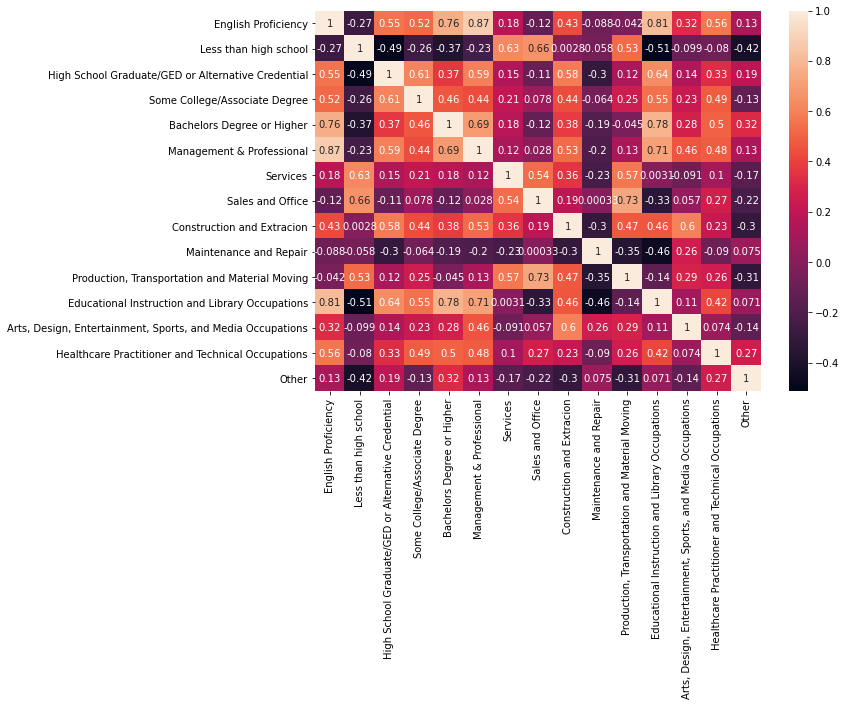

In [8]:
import seaborn as sns

plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
# plt.tight_layout()
plt.savefig("../correlations.png")

### Correlations for selected features:

In [9]:
df["English Proficiency"].corr(df['Bachelors Degree or Higher'])

0.7590534854142595

In [10]:
df['English Proficiency'].corr(df['Management & Professional'])

0.8740369685918613

In [11]:
df['English Proficiency'].corr(df['Other'])

0.1293874043501095

In [12]:
df['English Proficiency'].corr(df['Educational Instruction and Library Occupations'])

0.8072152504984214

In [13]:
df['Bachelors Degree or Higher'].corr(df['Management & Professional'])

0.6884390459841592

In [14]:
df['Bachelors Degree or Higher'].corr(df['Other'])

0.31638513892756864

In [15]:
df['Bachelors Degree or Higher'].corr(df['Educational Instruction and Library Occupations'])

0.775564688051428

### Deliverable 3 work

In [29]:
new_df = df[['English Proficiency', 'Bachelors Degree or Higher']]
new_df['Professional & Academic'] = df['Management & Professional'] + df['Educational Instruction and Library Occupations']
new_df

<ipython-input-29-4386a600607c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Professional & Academic'] = df['Management & Professional'] + df['Educational Instruction and Library Occupations']


,English Proficiency,Bachelors Degree or Higher,Professional & Academic
0,27903.0,9592.0,16977.0
1,22989.0,7438.0,15820.0
2,21125.0,7955.0,4687.0
3,27983.0,8224.0,18447.0
4,25659.0,10655.0,11977.0
5,28655.0,7395.0,12679.0
6,27515.0,12352.0,12378.0
7,26121.0,9860.0,14305.0
8,25566.0,9566.0,13908.0
9,26759.0,6134.0,13628.0


In [17]:
new_df['English Proficiency'].corr(new_df['Professional & Academic'])

0.8887111656236238

In [18]:
new_df['Bachelors Degree or Higher'].corr(new_df['Professional & Academic'])

0.7123840793287318

In [30]:
X_no_intercept = new_df[['Bachelors Degree or Higher', 'English Proficiency']]
y = new_df['Professional & Academic']
X_intercept = sm.add_constant(X_no_intercept)
len(X_intercept)

15

In [31]:
model = sm.OLS(y, X_intercept)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     Professional & Academic   R-squared:                       0.793
Model:                                 OLS   Adj. R-squared:                  0.759
Method:                      Least Squares   F-statistic:                     23.01
Date:                     Mon, 22 Nov 2021   Prob (F-statistic):           7.83e-05
Time:                             16:28:33   Log-Likelihood:                -139.87
No. Observations:                       15   AIC:                             285.7
Df Residuals:                           12   BIC:                             287.9
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

/Users/yichuanma/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
results.params

const                        -218997.937784
Bachelors Degree or Higher         0.159547
English Proficiency                1.183686
Years                             99.881964
dtype: float64

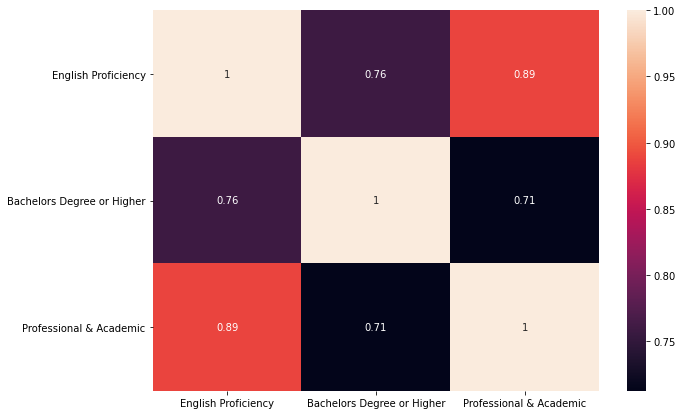

In [32]:
plt.subplots(figsize=(10, 7))
sns.heatmap(new_df.corr(), annot=True)
plt.savefig("../english_pro_correlations.png")

In [34]:
X_no_intercept = new_df['English Proficiency']
X_intercept = sm.add_constant(X_no_intercept)

In [35]:
model = sm.OLS(y, X_intercept)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     Professional & Academic   R-squared:                       0.790
Model:                                 OLS   Adj. R-squared:                  0.774
Method:                      Least Squares   F-statistic:                     48.85
Date:                     Mon, 22 Nov 2021   Prob (F-statistic):           9.49e-06
Time:                             17:16:49   Log-Likelihood:                -139.99
No. Observations:                       15   AIC:                             284.0
Df Residuals:                           13   BIC:                             285.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/Users/yichuanma/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


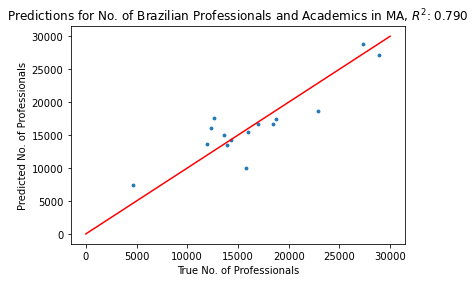

In [44]:
from sklearn.metrics import r2_score

y_pred = results.predict(X_intercept)
plt.scatter(y, y_pred, s=8)
plt.plot([0, 30000], [0, 30000], 'r-')
plt.xlabel('True No. of Professionals')
plt.ylabel('Predicted No. of Professionals')
r2 = r2_score(y, y_pred)
plt.title(f'Predictions for No. of Brazilian Professionals and Academics in MA, $R^2$: {r2:0.3f}')
plt.savefig('../pro_predictions.png')
plt.show()